# Knapsack Problem (High-Climbing)

In [1]:
from itertools import accumulate #used for generating cumulative sums of the list.
from icecream import ic #A debugging library to printvalues neatly
import numpy as np # A library for numerical operation
from tqdm.auto import tqdm # For displaying progress bars in loops
from matplotlib import pyplot as plt # For plotting the results.

c:\Users\anjal\Desktop\computational Interlligence\CI2024_lab1\CI2024_lab1\CI2024_lab1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
RANDOM_SEED = 42 # A random seed is set for reproducibility, ensuring the random numbers genertaed will be same each time we run the code.
np.random.seed(RANDOM_SEED)

MAX_STEPS = 5_000

In [11]:
instances = [
    {"id": 1, "universe_size": 100, "num_sets": 10, "density": 0.2},
    {"id": 2, "universe_size": 1000, "num_sets": 100, "density": 0.2},
    {"id": 3, "universe_size": 10000, "num_sets": 1000, "density": 0.2},
    {"id": 4, "universe_size": 100000, "num_sets": 10000, "density": 0.1},
    {"id": 5, "universe_size": 100000, "num_sets": 10000, "density": 0.2},
    {"id": 6, "universe_size": 100000, "num_sets": 10000, "density": 0.3},
]

In [4]:
def evaluate(knapsack, weights, values, max_weights):
    total_weights = np.sum(weights[knapsack], axis=0)
    if all(total_weights <= max_weights):
        return np.sum(values[knapsack])
    else:
        penalty = np.sum((total_weights - max_weights) ** 2 * (total_weights > max_weights))
        return np.sum(values[knapsack]) - penalty

In [8]:
def tweak(solution, num_items):
    new_solution = solution.copy()
    index = np.random.randint(0, num_items)
    new_solution[index] = not new_solution[index]  # Flip the bit
    return new_solution

In [9]:
def knapsack_solution(instance, max_steps=MAX_STEPS):
    universe_size = instance["universe_size"]
    num_sets = instance["num_sets"]
    density = instance["density"]

    # Generate weights, values, and max_weights
    weights = np.random.randint(1, 51, size=(num_sets, universe_size))
    max_weights = np.full(universe_size, universe_size * density * 10)
    values = np.random.randint(1, 101, size=num_sets)

    solution = np.full(num_sets, False)  # Initial solution
    history = [evaluate(solution, weights, values, max_weights)]

    patience = 1000  # Early stopping criteria
    no_improvement_count = 0
    current_value = evaluate(solution, weights, values, max_weights)

    for n in tqdm(range(max_steps)):
        new_solution = tweak(solution, num_sets)
        new_value = evaluate(new_solution, weights, values, max_weights)
        history.append(new_value)

        if new_value > current_value:
            solution = new_solution
            current_value = new_value
            no_improvement_count = 0  # Reset patience if improved
        else:
            no_improvement_count += 1

        if no_improvement_count > patience:
            print(f"No improvement after {patience} steps, stopping early.")
            break

    return current_value, history

 20%|██        | 1017/5000 [00:00<00:00, 10327.15it/s]


No improvement after 1000 steps, stopping early.
Instance: 1, Maximum Value: 234.0


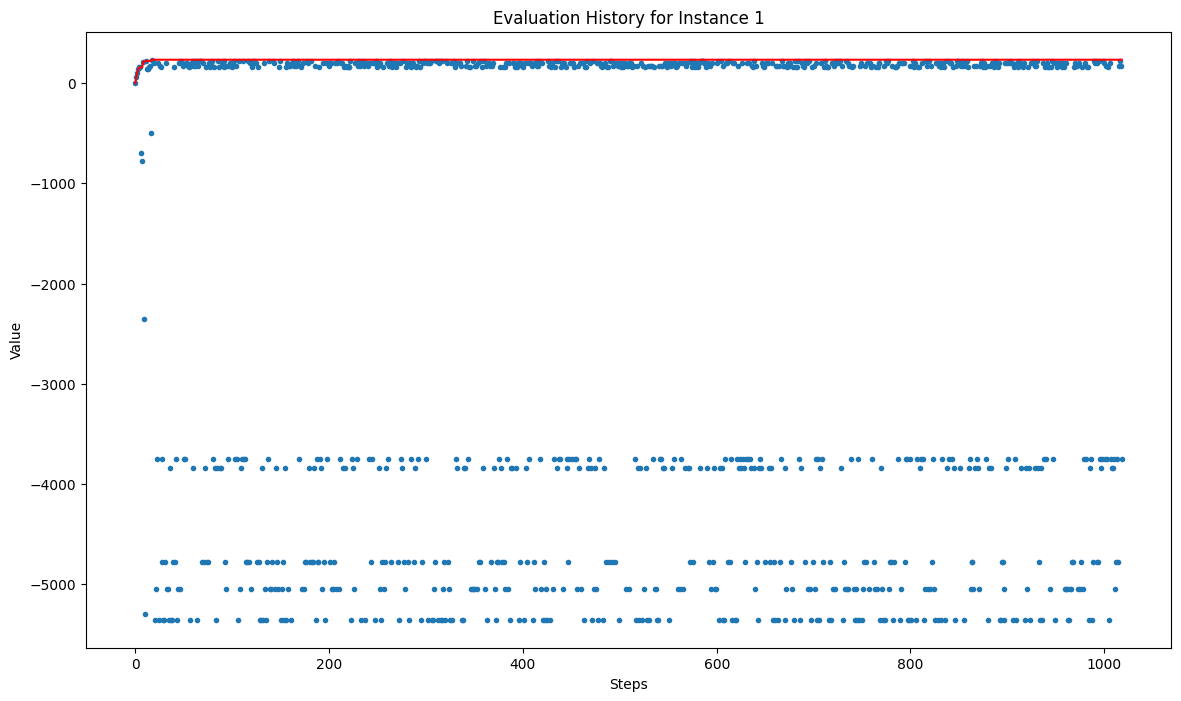

 25%|██▍       | 1246/5000 [00:00<00:00, 5615.21it/s]


No improvement after 1000 steps, stopping early.
Instance: 2, Maximum Value: 3647


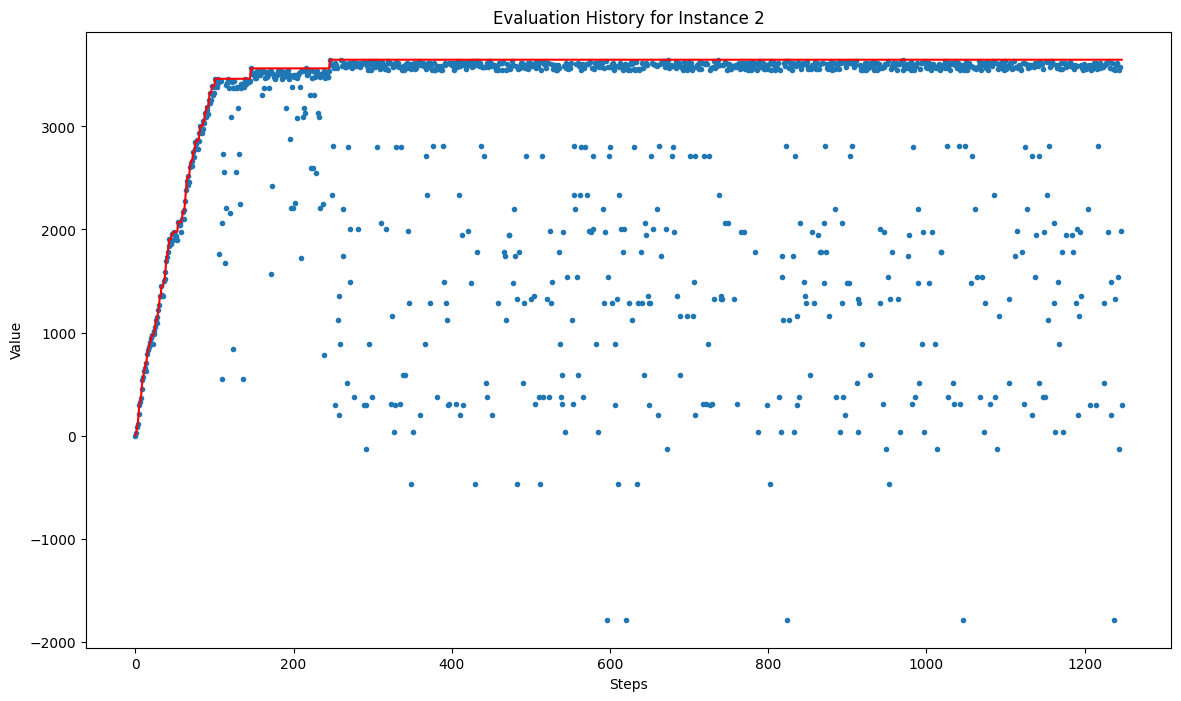

 57%|█████▋    | 2857/5000 [00:52<00:39, 54.10it/s]


No improvement after 1000 steps, stopping early.
Instance: 3, Maximum Value: 38230


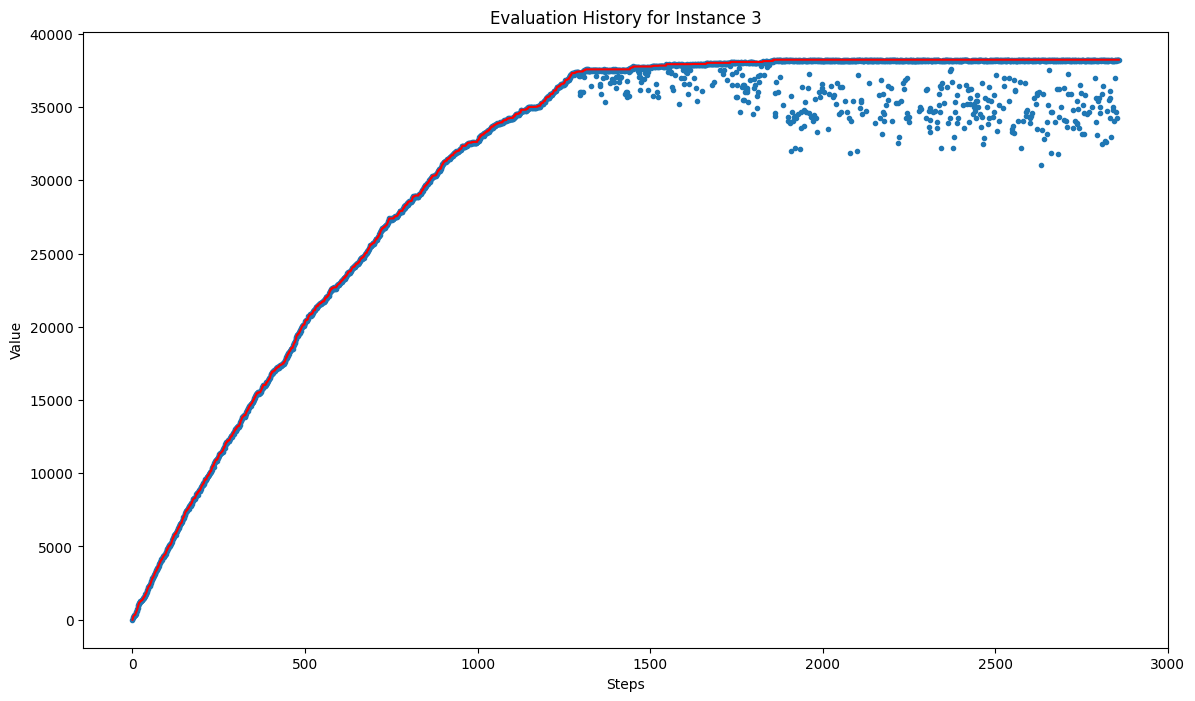

 66%|██████▌   | 3287/5000 [27:42<23:26,  1.22it/s]

In [10]:
results = []
for instance in instances:
    max_value, history = knapsack_solution(instance)
    results.append((instance, max_value))
    print(f"Instance: {instance['id']}, Maximum Value: {max_value}")

    # Plotting the evaluation history
    plt.figure(figsize=(14, 8))
    plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
    plt.scatter(range(len(history)), history, marker=".")
    plt.title(f'Evaluation History for Instance {instance["id"]}')
    plt.xlabel('Steps')
    plt.ylabel('Value')
    plt.show()

# Steepest Ascent with Restarts
NUM_RESTARTS = 3
STEEPEST_STEP_CANDIDATES = 5
TRUE_MAX_STEPS = MAX_STEPS // STEEPEST_STEP_CANDIDATES

In [13]:
def steepest_ascent(instance):
    universe_size = instance["universe_size"]
    num_sets = instance["num_sets"]
    density = instance["density"]

    # Generate weights, values, and max_weights
    weights = np.random.randint(1, 51, size=(num_sets, universe_size))
    max_weights = np.full(universe_size, universe_size * density * 10)
    values = np.random.randint(1, 101, size=num_sets)

    best_solution = None
    max_value = -1
    history = []

    for restart in tqdm(range(NUM_RESTARTS), desc="Restarts"):
        solution = np.full(num_sets, False)
        history.append(evaluate(solution, weights, values, max_weights))

        for step in tqdm(range(TRUE_MAX_STEPS // NUM_RESTARTS), desc=f"Step {restart+1}"):
            candidates = [tweak(solution, num_sets) for _ in range(STEEPEST_STEP_CANDIDATES)]
            candidates_fitness = [evaluate(c, weights, values, max_weights) for c in candidates]
            best_idx = np.argmax(candidates_fitness)

            new_solution = candidates[best_idx]
            new_value = candidates_fitness[best_idx]
            history.append(new_value)

            if new_value > evaluate(solution, weights, values, max_weights):
                solution = new_solution

        if evaluate(solution, weights, values, max_weights) > max_value:
            max_value = evaluate(solution, weights, values, max_weights)
            best_solution = solution

    return best_solution, max_value, history

# Testing steepest ascent with restarts
for instance in instances:
    best_solution, max_value, history = steepest_ascent(instance)
    print(f"Instance {instance['id']} - Best Solution: {best_solution}, Max Value: {max_value}")

: 